In [1]:
from pandas import read_csv, DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
df = read_csv('marketing.csv', sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data analysis
Check shape, not-null count, dty[e detected by pandas and dtypte deduction, enum values

In [3]:
# check general shape of the data 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# do we have to deal with null values?

# get count of non-null values
# statistical properties of all values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


No null values in any row, no need to imputation

In [5]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [6]:
notna = df.notna()
infodf = DataFrame({
    'Column': df.columns,
    'Not-null count': [notna[c].sum() for c in df.columns],
    'Dtype': [df[c].dtype for c in df.columns]
})

infodf.set_index('Column')

,Not-null count,Dtype
Column,,
age,45211,int64
job,45211,object
marital,45211,object
education,45211,object
default,45211,object
balance,45211,int64
housing,45211,object
loan,45211,object
contact,45211,object


In [7]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
df['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [10]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

## Data manipulation
### housing column

In [11]:
df['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

`bool` as `str`

In [12]:
df['housing'] = df['housing'].map(lambda x: x == 'yes')

### loan column

In [13]:
df['loan'].value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

`bool` as `str`

In [14]:
df['loan'] = df['loan'].map(lambda x: x == 'yes')

### default column

In [15]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

`bool` as `str`

In [16]:
df['default'] = df['default'].map(lambda x: x == 'yes')

In [17]:
df.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,blue-collar,married,secondary,False,0,True,False,cellular,20,may,124,1,-1,0,unknown,no


In [18]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,False,825,False,False,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,False,1729,False,False,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,False,5715,False,False,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,False,668,False,False,telephone,17,nov,508,4,-1,0,unknown,no


In [19]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [20]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

`bool` as `str`

In [21]:
df['y'] = df['y'].map(lambda x: x == 'yes')

## Visualisation

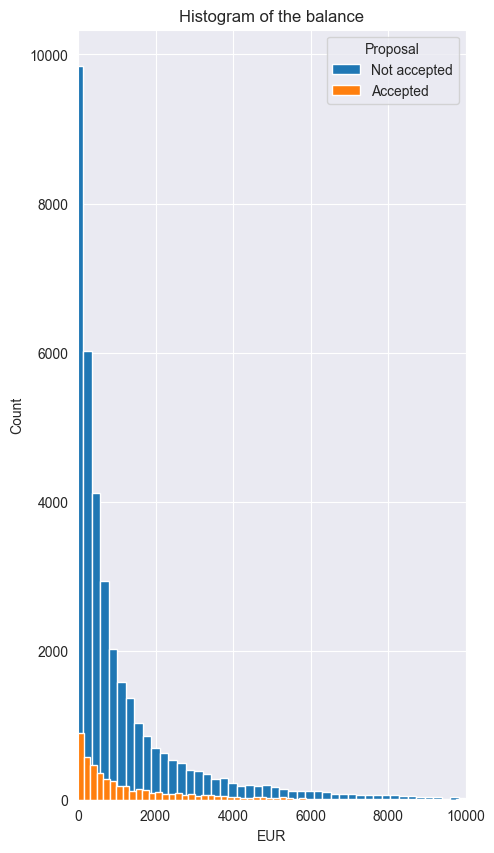

In [67]:

plt.figure(figsize=(5,10))
for label, dd in df.groupby('y'):
    plt.hist(dd['balance'], 500, label="Accepted" if label else "Not accepted")

plt.xlim(0,10000)
plt.title('Histogram of the balance')
plt.xlabel('EUR')
plt.ylabel('Count')
plt.legend(title='Proposal')
plt.show()

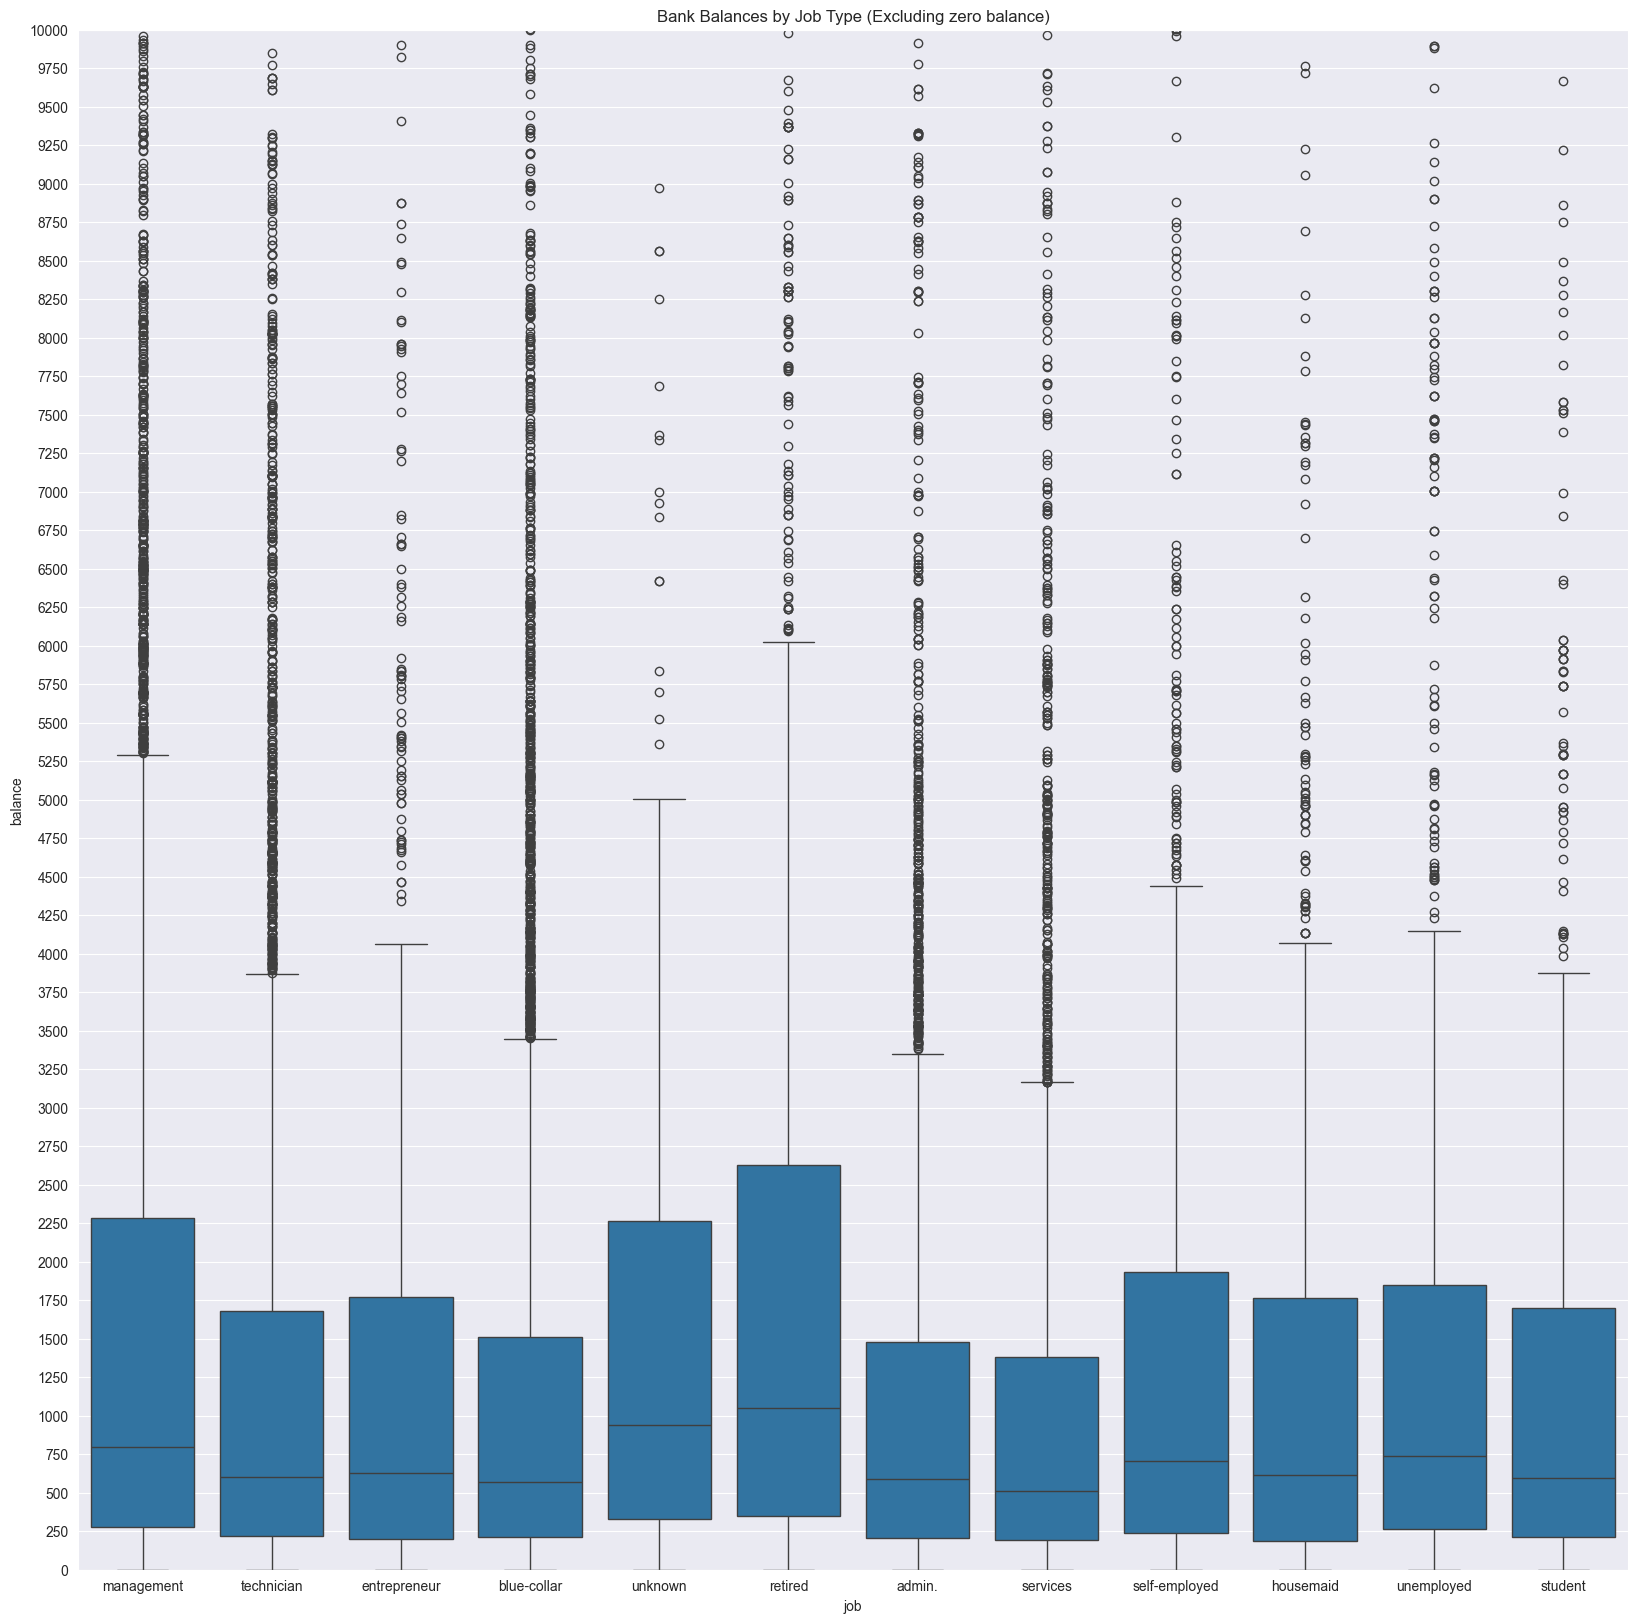

In [98]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.boxplot(x='job', y='balance', data=df[df['balance'] > 0])
plt.ylim(0, 10000)
plt.yticks(range(0,10001,250))
plt.title('Bank Balances by Job Type (Excluding zero balance)')
plt.show()

Balance appears to follow lognormal distribution

## Training model

In [22]:
df['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df[["age", "job", "marital", "education", "default", "balance", "housing", "loan", "contact", "day", "month",
        "campaign", "pdays", "previous", "poutcome"]].copy()
# duration dropped

y = df["y"]

job_encoder = LabelEncoder()
job_encoder.fit(df['job'])
X['job'] = job_encoder.transform(X['job'])

marital_encoder = LabelEncoder()
marital_encoder.fit(df['marital'])
X['marital'] = marital_encoder.transform(X['marital'])

poutcome_encoder = LabelEncoder()
poutcome_encoder.fit(X['poutcome'])
X['poutcome'] = poutcome_encoder.transform(X['poutcome'])

month_encoder = LabelEncoder()
month_encoder.fit(X['month'])
X['month'] = month_encoder.transform(X['month'])

contact_encoder = LabelEncoder()
contact_encoder.fit(X['contact'])
X['contact'] = contact_encoder.transform(X['contact'])

education_encoder = LabelEncoder()
education_encoder.fit(X['education'])
X['education'] = education_encoder.transform(X['education'])

classifier = RandomForestClassifier(n_estimators=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8902946120498982

## Save final data in a db

In [39]:
import sqlite3

con = sqlite3.connect('../project2.db')
cur = con.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS marketing(
    age INT NOT NULL,
    job INT NOT NULL,
    marital INT NOT NULL,
    education INT NOT NULL,
    default_ INT NOT NULL,
    balance INT NOT NULL,
    housing INT NOT NULL,
    loan INT NOT NULL,
    contact INT NOT NULL,
    day_ INT NOT NULL,
    month_ INT NOT NULL,
    campaign INT NOT NULL,
    pdays INT NOT NULL,
    previous INT NOT NULL,
    poutcome INT NOT NULL,
    label INT NOT NULL
);
""")

for (idx, row), label in zip(X.iterrows(), y):
    cur.execute("""
    INSERT INTO marketing (age, job, marital, education, default_, balance, housing, loan, contact, day_, month_, campaign, pdays, previous, poutcome, label)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, [
        row['age'],
        row['job'],
        row['marital'],
        row['education'],
        row['default'],
        row['balance'],
        row['housing'],
        row['loan'],
        row['contact'],
        row['day'],
        row['month'],
        row['campaign'],
        row['pdays'],
        row['previous'],
        row['poutcome'],
        label
    ])

con.commit()
con.close()


## Pickle objects
Serialise classifier and encoders for usage with flask

In [55]:
import pickle

with open('pickled/job_encoder.pkl', 'wb') as f:
    pickle.dump(job_encoder, f)

with open('pickled/marital_encoder.pkl', 'wb') as f:
    pickle.dump(marital_encoder, f)

with open('pickled/poutcome_encoder.pkl', 'wb') as f:
    pickle.dump(poutcome_encoder, f)

with open('pickled/month_encoder.pkl', 'wb') as f:
    pickle.dump(month_encoder, f)

with open('pickled/contact_encoder.pkl', 'wb') as f:
    pickle.dump(contact_encoder, f)

with open('pickled/education_encoder.pkl', 'wb') as f:
    pickle.dump(education_encoder, f)

with open('pickled/classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)
